Analyzed, Categorized and Visualized the spending habits with SQL query output

**1.Total amount spent in each category for over all 2024**

In [ ]:
import mysql.connector
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy
#import sqlite3

connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Devi!1990",
    database="expense"
)

if connection.is_connected():
 print("connected to mysql")

cursor=connection.cursor()


query1 = "select sum(amount) as total_amount_Shopping from expense_year where category = 'Shopping';"
query2 = "select sum(amount) as total_amount_Subscription from expense_year where category = 'Subscription';"
query3 = "select sum(amount) as total_amount_Groceries from expense_year where category = 'Groceries';"
query4= "select sum(amount) as total_amount_HealthMedicine from expense_year where category = 'Health and Medicine';"
query5 = "select sum(amount) as total_amount_Investment from expense_year where category = 'Investment';"
query6 = "select sum(amount) as total_amount_Loanamount from expense_year where category = 'Loan amount';"
query7 = "select sum(amount) as total_amount_Schoolfees from expense_year where category = 'School fees';"
# Fetch data from the database
df1 = pd.read_sql_query(query1, connection)
df2 = pd.read_sql_query(query2, connection)
df3 = pd.read_sql_query(query3, connection)
df4 = pd.read_sql_query(query4, connection)
df5 = pd.read_sql_query(query5, connection)
df6 = pd.read_sql_query(query6, connection)
df7 = pd.read_sql_query(query7, connection)

# Display the dataframes in Streamlit
st.write("Shopping")
st.dataframe(df1)

st.write("Subscription")
st.dataframe(df2)

st.write("Groceries")
st.dataframe(df3)

st.write("Health and Medicine")
st.dataframe(df4)

st.write("Investment")
st.dataframe(df5)

st.write("Loan amount")
st.dataframe(df6)

st.write("School fees")
st.dataframe(df7)

# Example: Plotting data from the first dataframe
fig, ax = plt.subplots()
ax.bar(['Shopping', 'Subscription', 'Groceries', 'Health and Medicine', 'Investment', 'Loan amount', 'School fees'],
       [df1['total_amount_Shopping'].item(), df2['total_amount_Subscription'].item(), df3['total_amount_Groceries'].item(),
       df4['total_amount_HealthMedicine'].item(), df5['total_amount_Investment'].item(), df6['total_amount_Loanamount'].item(),
       df7['total_amount_Schoolfees'].item()],
       color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black'])

ax.set_title('Total amount spent in each category for 2024')
ax.set_ylabel('Total Amount')
ax.set_xlabel('Categories')
plt.xticks(rotation=45)

st.pyplot(fig)





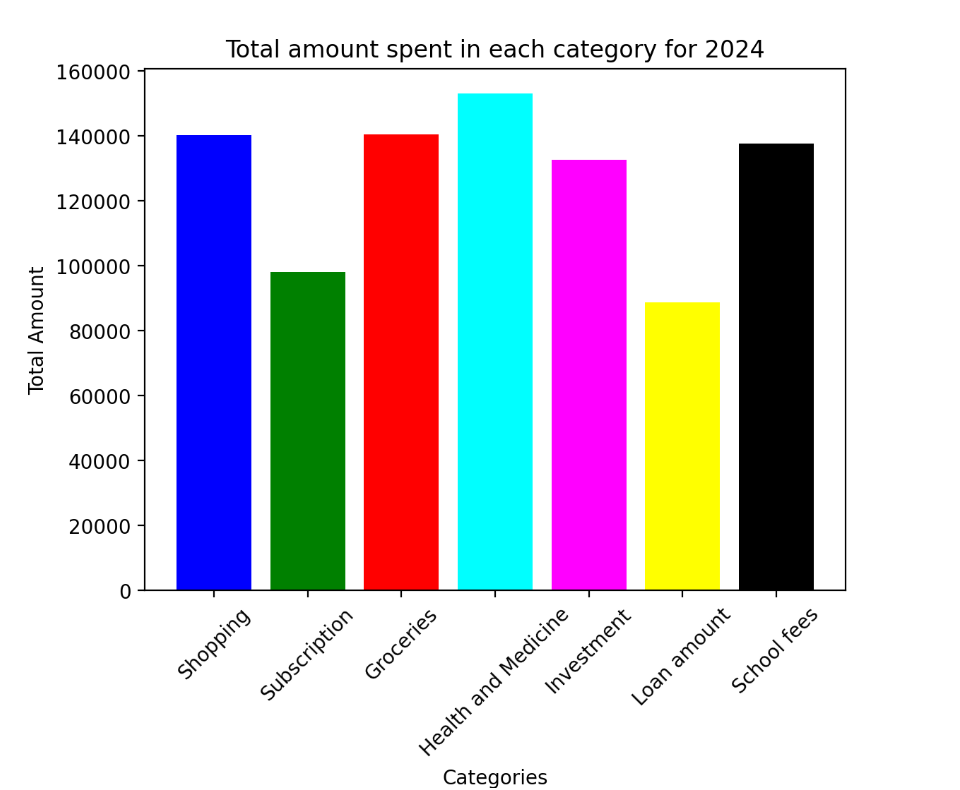

**2.Total amount spent using each payment mode**

In [ ]:
query1 = "select sum(amount) as total_amount_Cash from expense_year where Payment_Mode = 'Cash';"
query2 = "select sum(amount) as total_amount_Creditcard from expense_year where Payment_Mode = 'Credit card';"
query3 = "select sum(amount) as total_amount_Debitcard from expense_year where Payment_Mode = 'Debit card';"
query4= "select sum(amount) as total_amount_Netbanking from expense_year where Payment_Mode = 'Netbanking';"
query5 = "select sum(amount) as total_amount_UPI from expense_year where Payment_Mode = 'UPI';"
query6 = "select sum(amount) as total_amount_Wallet from expense_year where Payment_Mode = 'Wallet';"

# Fetch data from the database
df1 = pd.read_sql_query(query1, connection)
df2 = pd.read_sql_query(query2, connection)
df3 = pd.read_sql_query(query3, connection)
df4 = pd.read_sql_query(query4, connection)
df5 = pd.read_sql_query(query5, connection)
df6 = pd.read_sql_query(query6, connection)

# Display the dataframes in Streamlit
st.write("Cash")
st.dataframe(df1)

st.write("Credit Card")
st.dataframe(df2)

st.write("Debit card")
st.dataframe(df3)

st.write("Netbanking")
st.dataframe(df4)

st.write("UPI")
st.dataframe(df5)

st.write("Wallet")
st.dataframe(df6)

# Example: Plotting data from the first dataframe
fig, ax = plt.subplots()
ax.bar(['Cash', 'Credit card', 'Debit card', 'Netbanking', 'UPI', 'Wallet'],
       [df1['total_amount_Cash'].item(), df2['total_amount_Creditcard'].item(), df3['total_amount_Debitcard'].item(),
       df4['total_amount_Netbanking'].item(), df5['total_amount_UPI'].item(), df6['total_amount_Wallet'].item()],
       color=['blue', 'green', 'red', 'magenta', 'yellow', 'black'])

ax.set_title('Total amount spent using each payment mode')
ax.set_ylabel('Total Amount')
ax.set_xlabel('Payment_Mode')
plt.xticks(rotation=45)

st.pyplot(fig)

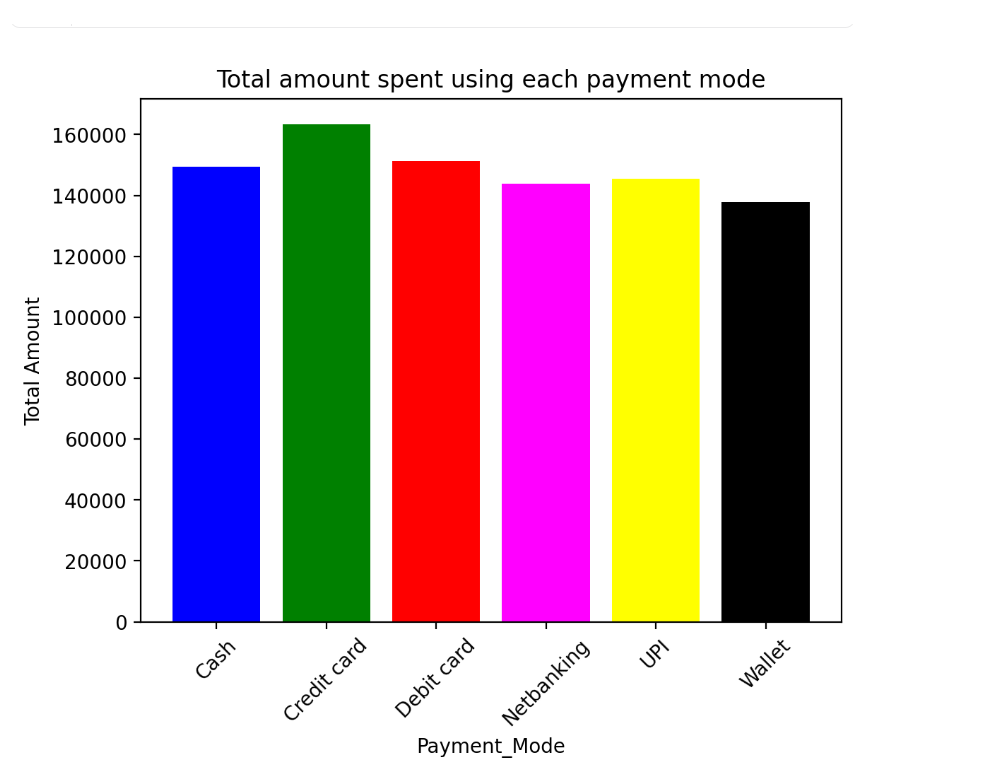

**3.Total cashback received across all transactions**

In [ ]:
query = "select sum(cashback) as total_amount_cashback from expense_year;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)

# Display the DataFrame
st.write(df)
# Plot the data
fig, ax = plt.subplots()
ax.plot(df['total_amount_cashback'],marker='o')

# Customize the plot
ax.set_title('Total cashback received across all transactions')
ax.set_xlabel('total_amount_cashback')
#ax.set_ylabel('Y-axis Label')

# Display the plot in Streamlit
st.pyplot(fig)

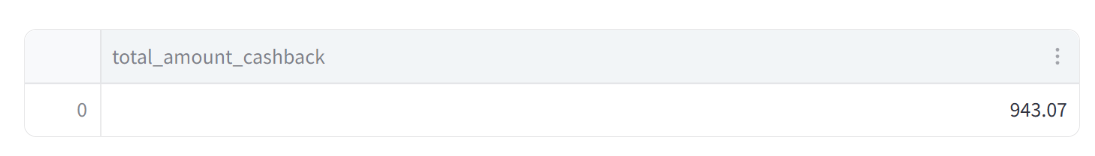

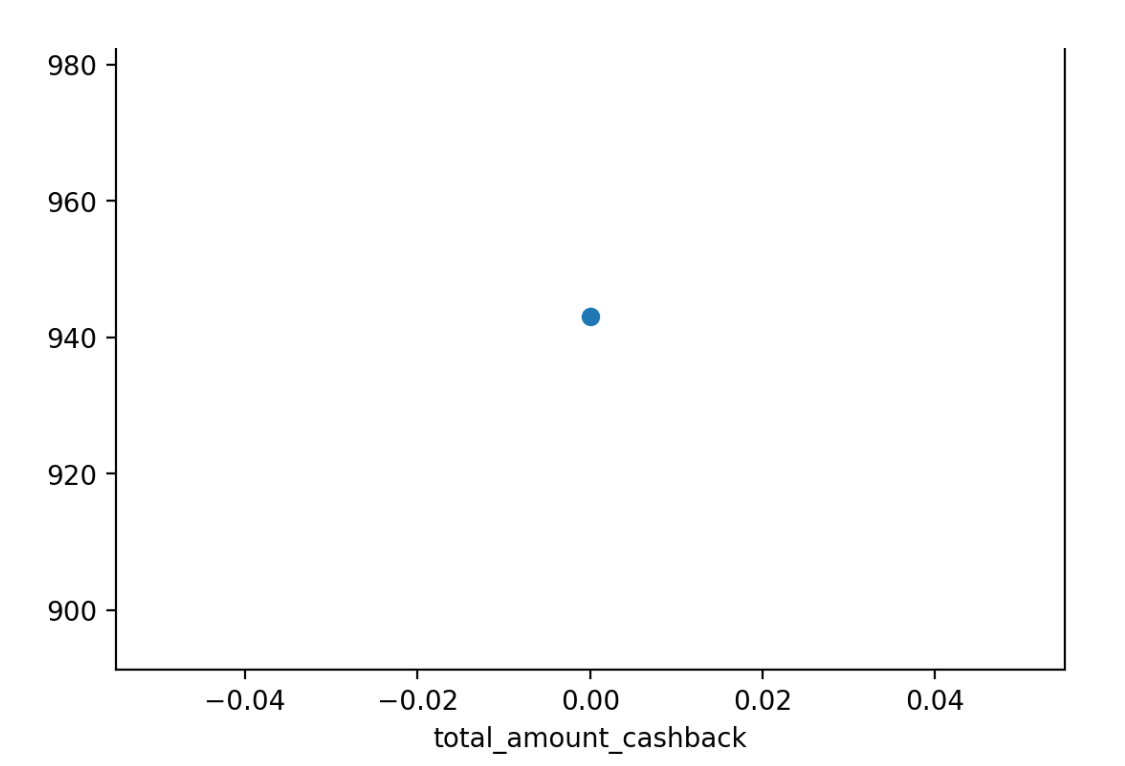

**4.Top 5 most expensive categories in terms of spending**

In [ ]:
import mysql.connector
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd

connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Devi!1990",
    database="expense"
)

if connection.is_connected():
 print("connected to mysql")

cursor=connection.cursor()


query = "select category,sum(amount) as total_amount from expense_year group by category order by total_amount desc limit 5;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)


# Display the DataFrame
st.write(df)
# Plot the data
fig, ax = plt.subplots()
ax.plot(df['category'], df['total_amount'], marker='o')

# Customize the plot
ax.set_title('Top 5 most expensive categories in terms of spending')
ax.set_xlabel('category')
ax.set_ylabel('total_amount')

# Display the plot in Streamlit
st.pyplot(fig)

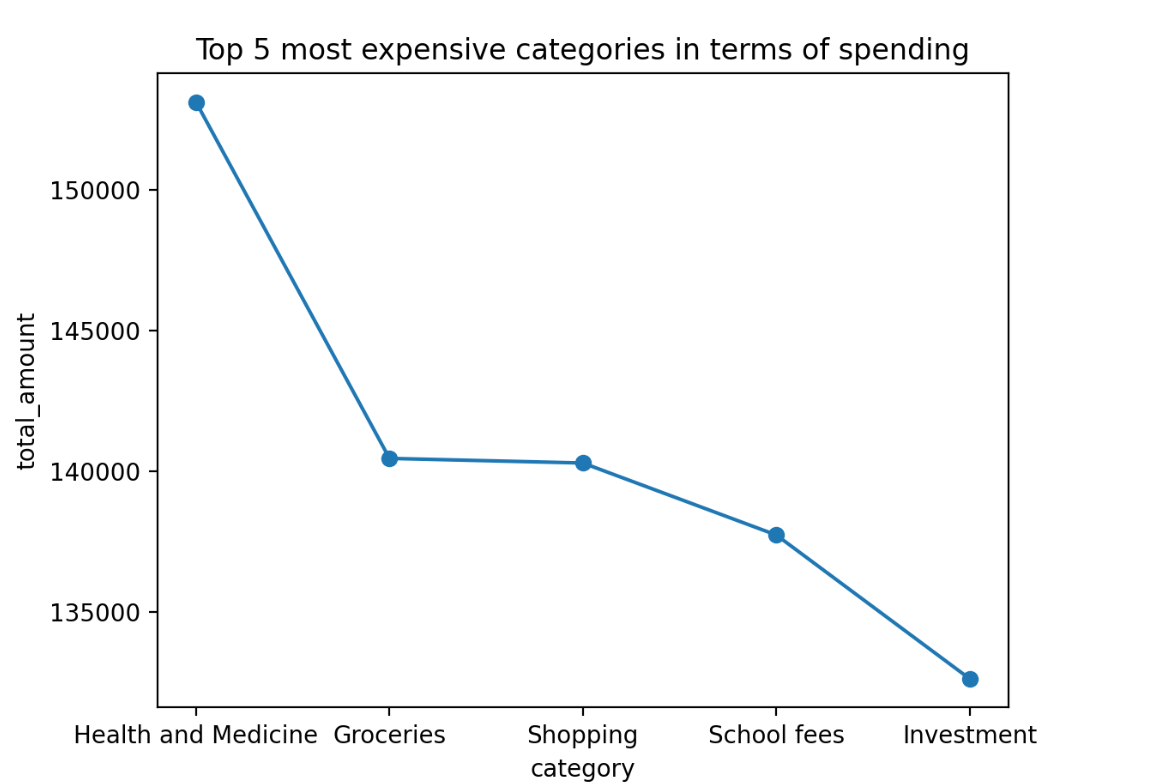

**5.Amount spent on transportation using different payment modes**

Similar code as question 1 & 2

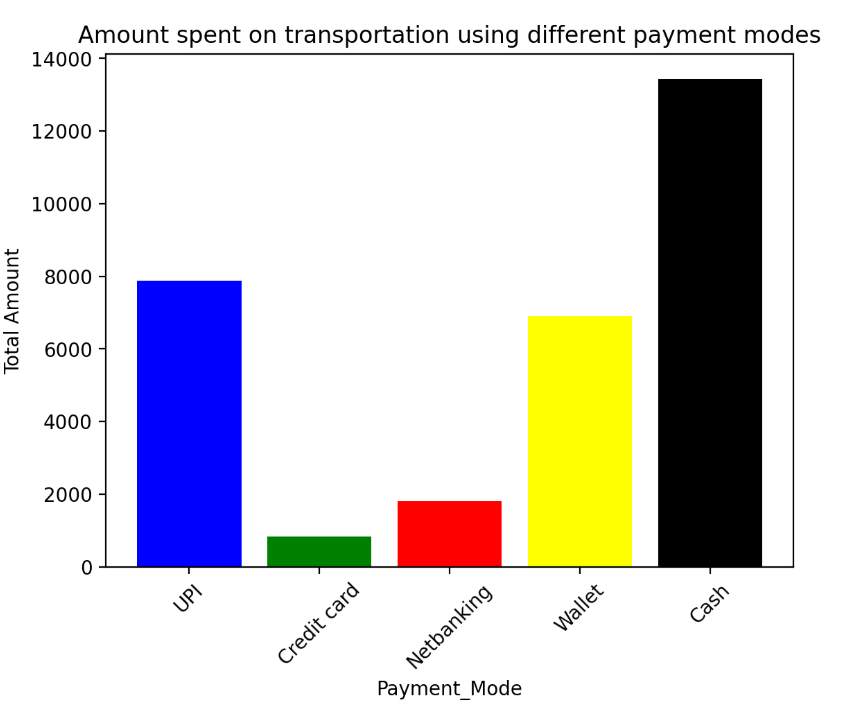

**6.Transactions resulted in cashback**

In [ ]:
query = "select distinct payment_mode as transaction from expense_year where cashback > 0;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)

# Display the DataFrame
st.write(df)
# Plot the data
fig, ax = plt.subplots()
ax.plot(df['transaction'],marker='o')

# Customize the plot
ax.set_title('transactions resulted in cashback')
ax.set_xlabel('transaction')
#ax.set_ylabel('Y-axis Label')

# Display the plot in Streamlit
st.pyplot(fig)

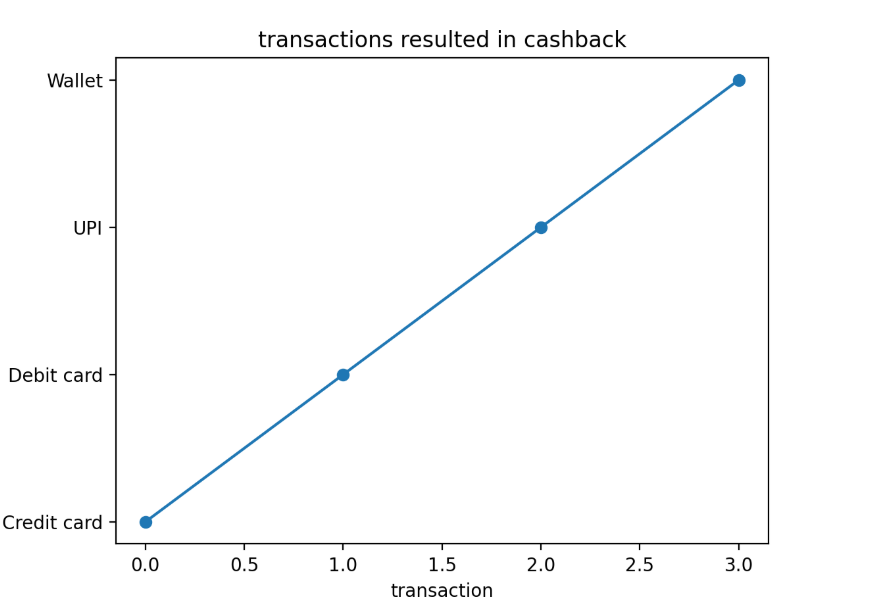

**7.Total spending in each month of the year**

In [ ]:
query1 = "select sum(amount)as Jan_spending from expense_year where months='Jan';"
query2 = "select sum(amount)as Feb_spending from expense_year where months='Feb';"
query3 = "select sum(amount)as March_spending from expense_year where months='March';"
query4= "select sum(amount)as April_spending from expense_year where months='April';"
query5 = "select sum(amount)as May_spending from expense_year where months='May';"
query6 = "select sum(amount)as June_spending from expense_year where months='June';"
query7 = "select sum(amount)as July_spending from expense_year where months='July';"
query8 = "select sum(amount)as Aug_spending from expense_year where months='Aug';"
query9 = "select sum(amount)as Sep_spending from expense_year where months='Sep';"
query10 = "select sum(amount)as Oct_spending from expense_year where months='Oct';"
query11 = "select sum(amount)as Nov_spending from expense_year where months='Nov';"
query12 = "select sum(amount)as Dec_spending from expense_year where months='Dec';"

# Fetch data from the database
df1 = pd.read_sql_query(query1, connection)
df2 = pd.read_sql_query(query2, connection)
df3 = pd.read_sql_query(query3, connection)
df4 = pd.read_sql_query(query4, connection)
df5 = pd.read_sql_query(query5, connection)
df6 = pd.read_sql_query(query6, connection)
df7 = pd.read_sql_query(query7, connection)
df8 = pd.read_sql_query(query8, connection)
df9 = pd.read_sql_query(query9, connection)
df10 = pd.read_sql_query(query10, connection)
df11 = pd.read_sql_query(query11, connection)
df12 = pd.read_sql_query(query12, connection)


# Example: Plotting data from the first dataframe
fig, ax = plt.subplots()
ax.bar(['Jan', 'Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],
       [df1['Jan_spending'].item(), df2['Feb_spending'].item(), df3['March_spending'].item(),
       df4['April_spending'].item(), df5['May_spending'].item(),df6['June_spending'].item(),df7['July_spending'].item(),df8['Aug_spending'].item(),df9['Sep_spending'].item(),df10['Oct_spending'].item(),df11['Nov_spending'].item(),df12['Dec_spending'].item()],
       color=['blue', 'green','red','yellow','black','magenta','red','magenta','cyan','blue','green','red'])

ax.set_title('Total spending in each month of the year')
ax.set_ylabel('Total Amount')
ax.set_xlabel('Month')
plt.xticks(rotation=45)

st.pyplot(fig)


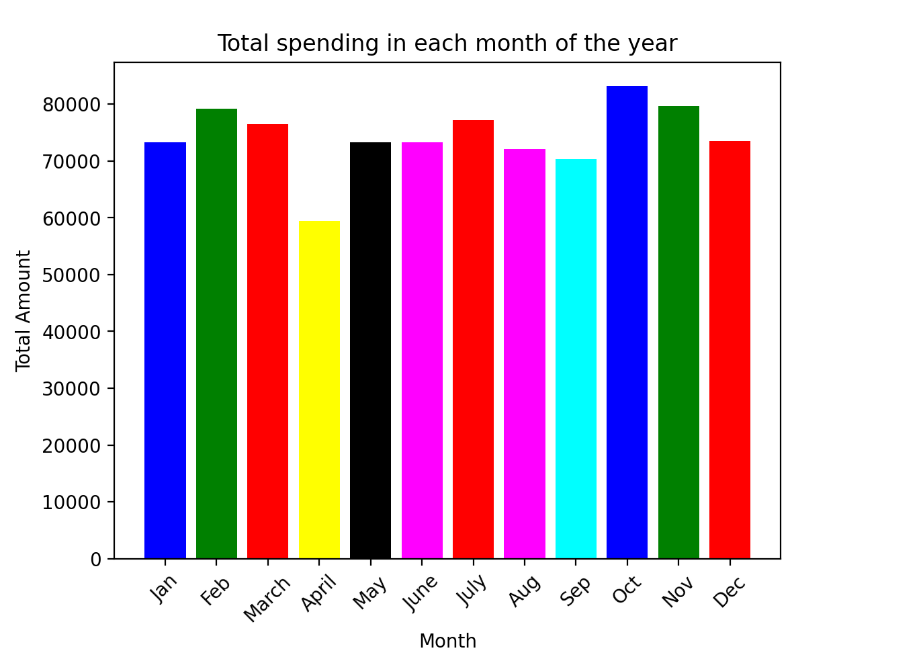

**8.Month which have the highest spending in categories like "Travel," "Entertainment," or "Gifts"?**

In [ ]:
query = "select months,Discription,sum(amount) as total_spending from expense_year where discription in('Toys/Gifts Purchase','Transportation','Movie charge','Subscription for Hotstar','Subscription for Netflix') group by months,discription order by total_spending desc limit 1;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)

# Plotting the 3D graph
fig = px.scatter_3d(df, x='months', y='Discription', z='total_spending')

# Display the plot in Streamlit
st.plotly_chart(fig)

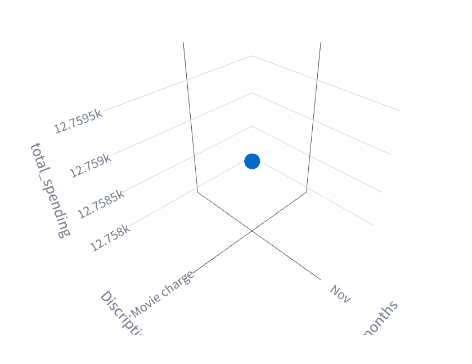

**9.Recurring expenses that occur during specific months of the year**

In [ ]:
query = "select category,months,count(amount)as recurrence_count from expense_year group by months,category having recurrence_count > 1 order by months,category;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)

# Plotting the 3D graph
fig = px.scatter_3d(df, x='category', y='months', z='recurrence_count')

# Display the plot in Streamlit
st.plotly_chart(fig)

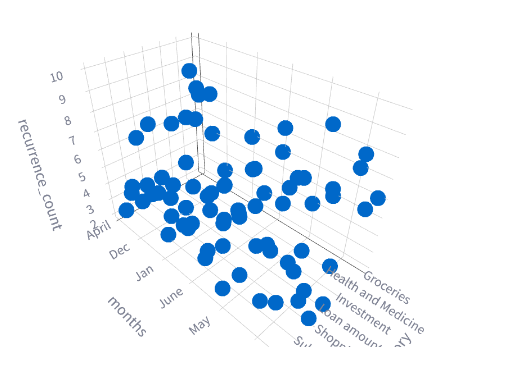

**10.Cashback or rewards were earned in each month**

In [ ]:
query = "select months,sum(cashback)as cashback from expense_year where cashback>0 group by months;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)


# Display the DataFrame
st.write(df)
# Plot the data
fig, ax = plt.subplots()
ax.plot(df['months'], df['cashback'], marker='o')

# Customize the plot
ax.set_title('Cashback or rewards were earned in each month')
ax.set_xlabel('months')
ax.set_ylabel('cashback')

# Display the plot in Streamlit
st.pyplot(fig)

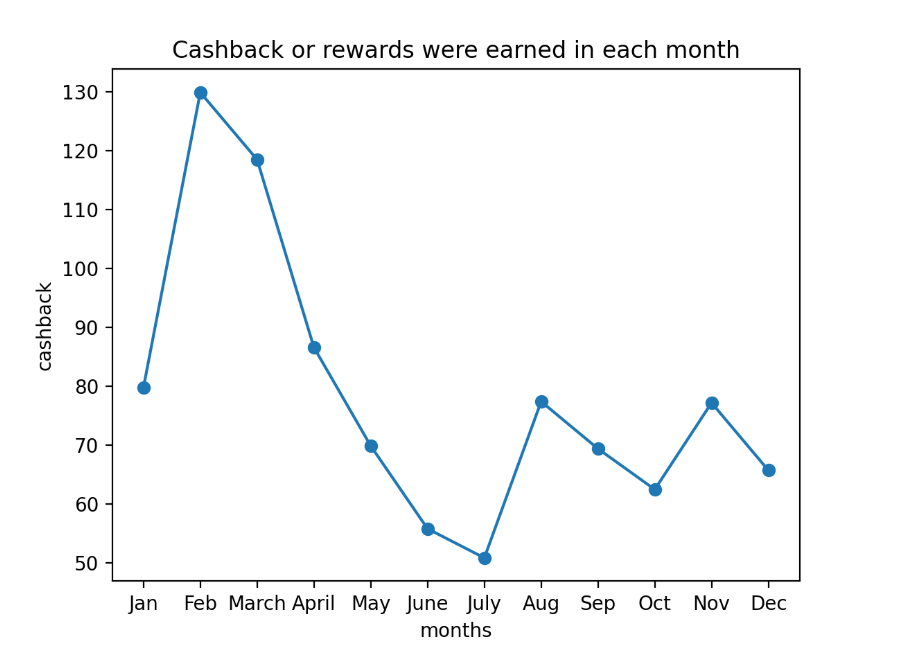

**11.Overall spending changed over time (e.g., increasing, decreasing, remaining stable).**

In [ ]:
query = "WITH monthly_spending AS (SELECT months,SUM(amount) AS total_spending FROM expense_year GROUP BY months),spending_change AS (SELECT months,total_spending,LAG(total_spending) OVER (ORDER BY CASE WHEN months = 'Jan' THEN 1 WHEN months = 'Feb' THEN 2 WHEN months = 'March' THEN 3 WHEN months = 'April' THEN 4 WHEN months = 'May' THEN 5 WHEN months = 'June' THEN 6 WHEN months = 'July' THEN 7 WHEN months = 'Aug' THEN 8 WHEN months = 'Sep' THEN 9 WHEN months = 'Oct' THEN 10 WHEN months = 'Nov' THEN 11 WHEN months = 'Dec' THEN 12 ELSE 13 END ASC) AS previous_month_spending FROM monthly_spending)SELECT months,total_spending,previous_month_spending,(total_spending - previous_month_spending) AS change_in_spending FROM spending_change GROUP BY months ORDER BY CASE WHEN months = 'Jan' THEN 1 WHEN months = 'Feb' THEN 2 WHEN months = 'March' THEN 3 WHEN months = 'April' THEN 4 WHEN months = 'May' THEN 5 WHEN months = 'June' THEN 6 WHEN months = 'July' THEN 7 WHEN months = 'Aug' THEN 8 WHEN months = 'Sep' THEN 9 WHEN months = 'Oct' THEN 10 WHEN months = 'Nov' THEN 11 WHEN months = 'Dec' THEN 12 ELSE 13 END ASC;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)

# Plotting the 3D graph
fig = px.scatter_3d(df, x='months', y='total_spending', z='change_in_spending')

# Display the plot in Streamlit
st.plotly_chart(fig)

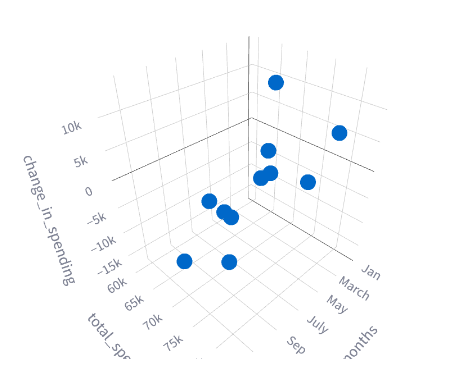

**12.Typical costs associated with different types of travel**

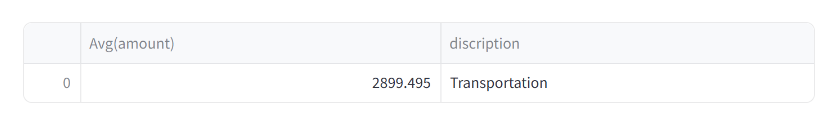

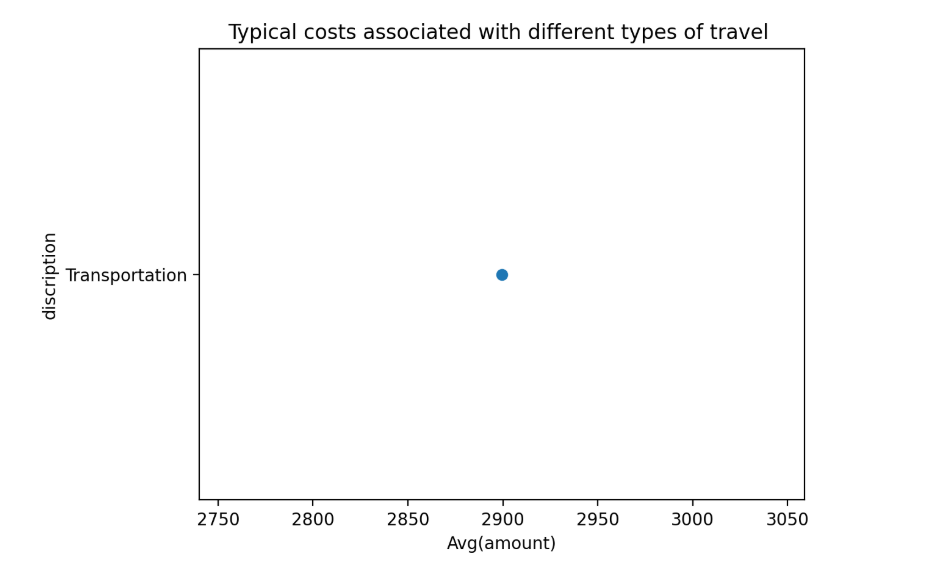

**13.Patterns in grocery spending**

1)For seasonal spending like Diwali and New year it is high

In [ ]:
query = "select months,category,sum(amount)as Grocery_amount from expense_year where category= 'Groceries' group by months,category order by grocery_amount desc;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)

# Plotting the 3D graph
fig = px.scatter_3d(df, x='months', y='category', z='Grocery_amount')

# Display the plot in Streamlit
st.plotly_chart(fig)

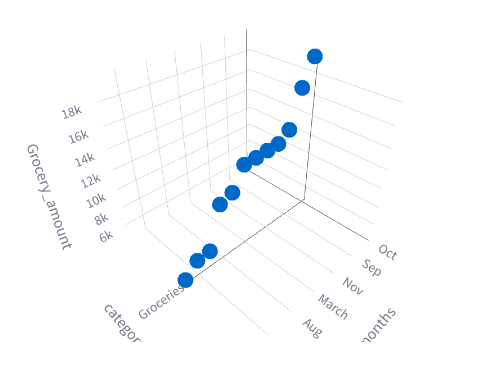

2)For weekdays(Sunday was spent a lot)

In [ ]:

query = "select DAYNAME(date) as DayName,category,sum(amount)as Grocery_amount from expense_year where category= 'Groceries' group by DayName,category order by grocery_amount desc;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)

# Plotting the 3D graph
fig = px.scatter_3d(df, x='DayName', y='category', z='Grocery_amount')

# Display the plot in Streamlit
st.plotly_chart(fig)

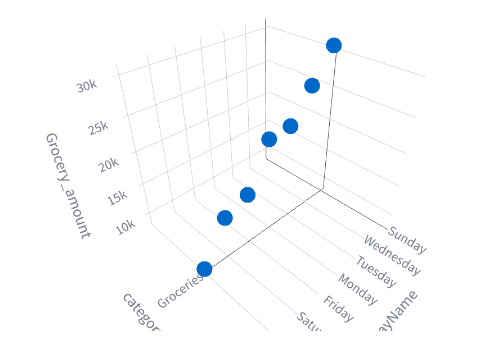

**14.High and Low Priority Categories**

In [ ]:
query = "select category,sum(amount)as total_spent from expense_year group by category order by total_spent desc;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)



# Display the DataFrame
st.write(df)
# Plot the data
fig, ax = plt.subplots()
ax.plot(df['category'], df['total_spent'], marker='o')

# Customize the plot
ax.set_title('High and Low Priority Categories')
ax.set_xlabel('category')
ax.set_ylabel('total_spent')

# Display the plot in Streamlit
st.pyplot(fig)

Here high priority on Health & Medicine where as low priority on Loan amount.
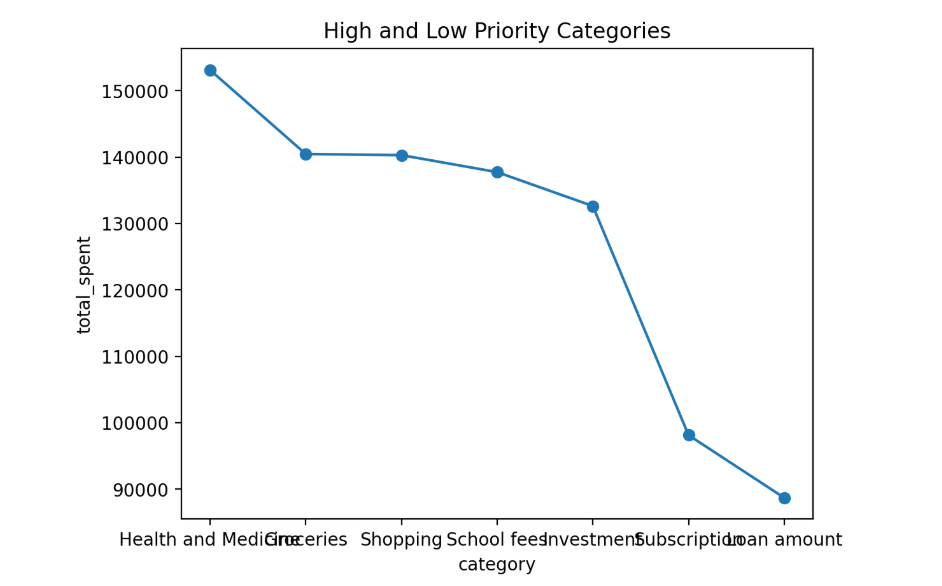

**15.Category contributes the highest percentage of the total spending**

In [ ]:
query = "SELECT category, (SUM(amount) / (SELECT SUM(amount) FROM expense_year)) * 100 AS Percentage_of_total FROM expense_year GROUP BY category ORDER BY Percentage_of_total DESC LIMIT 1;"

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, connection)



# Display the DataFrame
st.write(df)
# Plot the data
fig, ax = plt.subplots()
ax.plot(df['category'], df['Percentage_of_total'], marker='o')

# Customize the plot
ax.set_title('High and Low Priority Categories')
ax.set_xlabel('category')
ax.set_ylabel('Percentage_of_total')

# Display the plot in Streamlit
st.pyplot(fig)

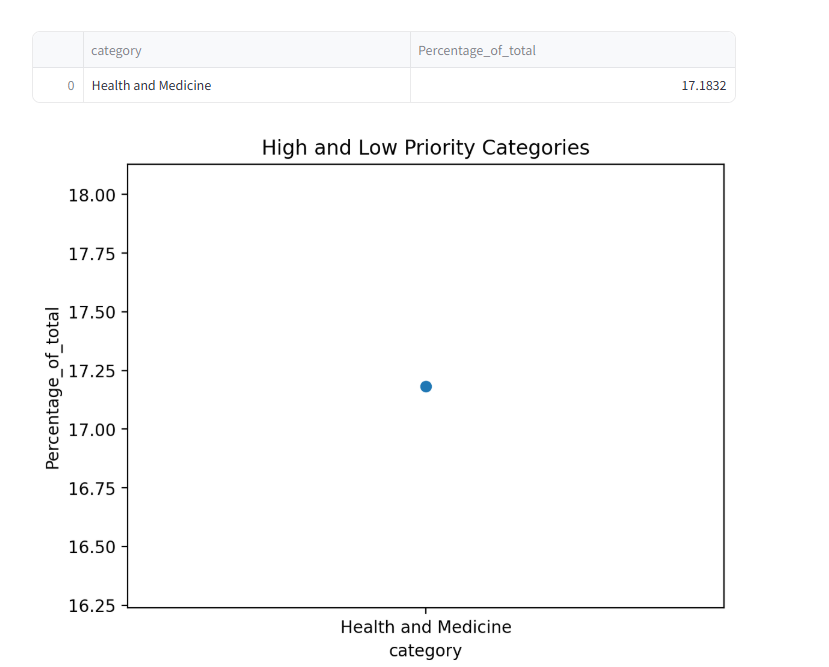

**16.Overall saving for the year**

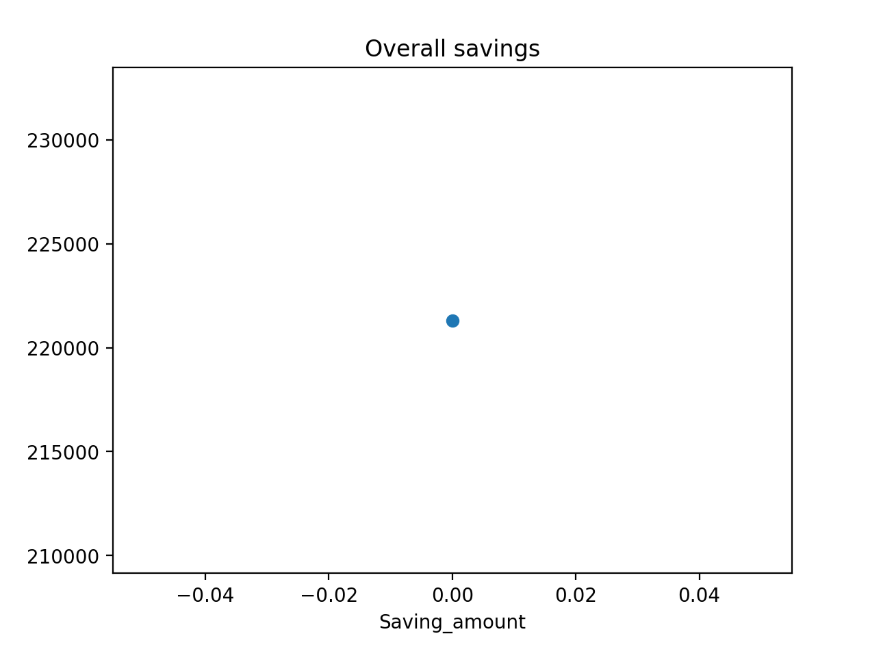

**17.Average amount spent per month**

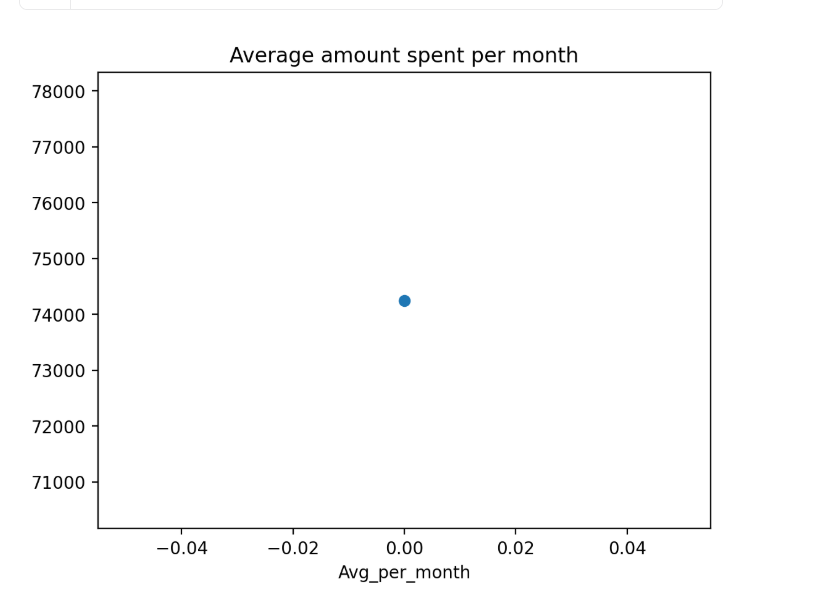